In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import streamlit as st
import pickle
# import xgboost as xgb

In [2]:
# title of app
st.title('Resale Flat Prices')

2021-09-11 20:04:30.075 
  command:

    streamlit run C:\Users\Russ\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# Load data

In [3]:
# cache data for quicker loading
@st.cache
# load data from csv
def load_data_from_csv(file_path):
    # read data
    data = pd.read_csv(file_path)
    # convert to year_month to datetime format
    data['year_month'] = pd.to_datetime(data['year_month'])
    # convert latitude and longitude to numeric
    data[['latitude', 'longitude']] = data[['latitude', 'longitude']].apply(pd.to_numeric)
    # return 
    return data

# load data from csv
data = load_data_from_csv('resale_flat_prices_clean_data.csv')

In [5]:
# slider to select past n number of years of data to use

# set default value to past 10 years
# set to use at least past 1 year of data
# determine max number of years from data
max_past_n_years = round((data['year_month'].max() - data['year_month'].min()) / np.timedelta64(1, 'Y')) + 1
# define slider
past_n_years = st.slider('How many years of past data would you like to use?', min_value=1, max_value=max_past_n_years, value=10)

In [6]:
# filter number of years of data to use based on slider

# define latest year of data
latest_year = str(data['year_month'].max().year - past_n_years)
# filter past n number of years
data = data.loc[(data['year_month'] >= latest_year+'-01-01')]

# Visualise data

In [7]:
### map using latitude and longitude ###
# map
st.map(data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

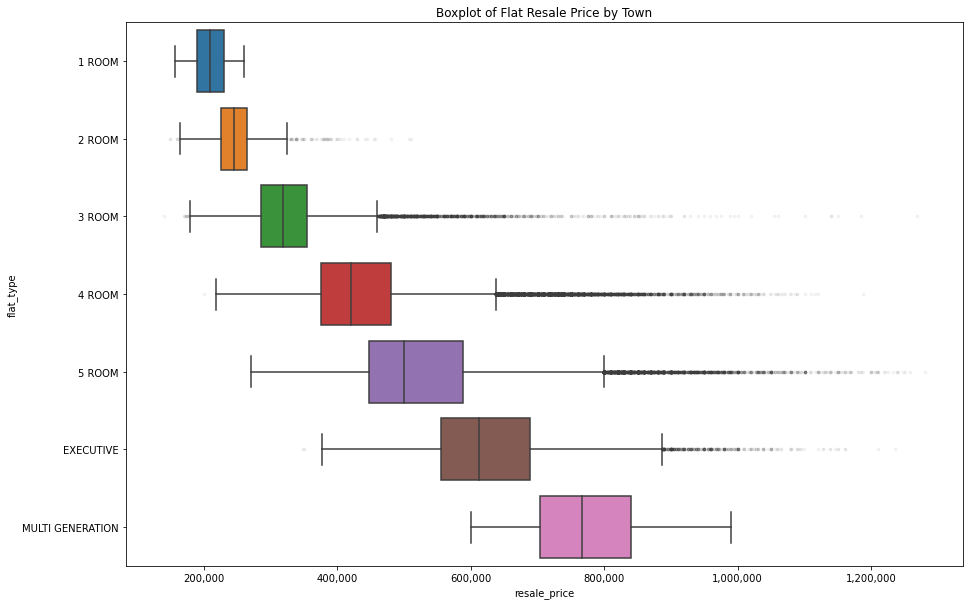

In [8]:
### boxplot of flat type ###

# set plot and figure size
fig, ax = plt.subplots(figsize=(15,10))

# order by flat_type alphabetically
flat_type_order = sorted(list(data['flat_type'].unique()))
# plot ax
ax = sns.boxplot(
    x='resale_price', 
    y='flat_type', 
    data=data,
    order=flat_type_order, 
    flierprops={'marker':'.', 'alpha':0.05}
    )

# formatting
# add thousands separator
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# set title
ax.set_title('Boxplot of Flat Resale Price by Town')

# show plot
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

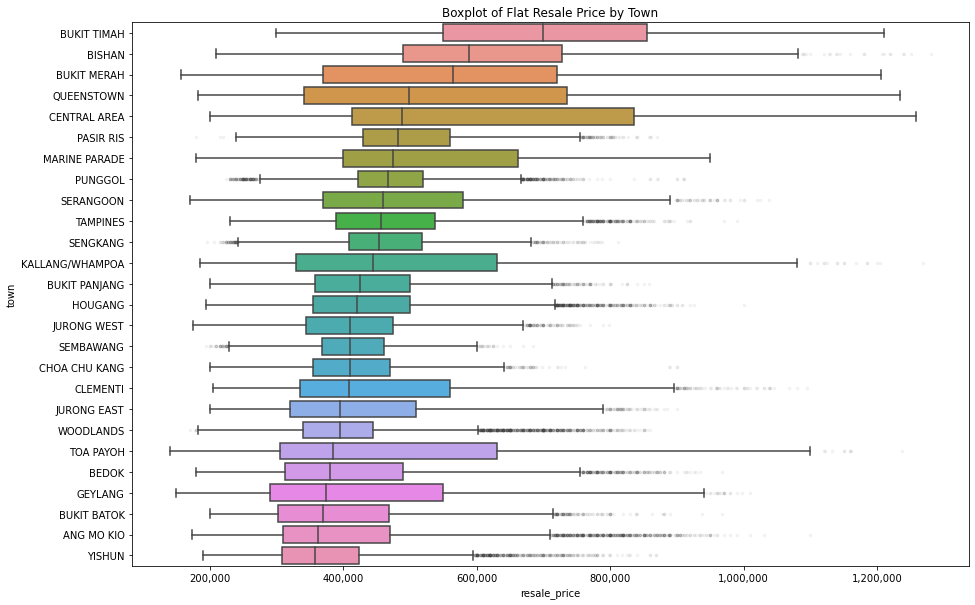

In [9]:
### boxplot of town ###

# set plot and figure size
fig, ax = plt.subplots(figsize=(15,10))

# order by descending median resale_price
town_order = list(data.groupby(['town']).agg({'resale_price':'median'}).reset_index().sort_values('resale_price', ascending=False)['town'])
# plot boxplot
sns.boxplot(
    x='resale_price', 
    y='town', 
    data=data, 
    order=town_order,
    flierprops={'marker':'.', 'alpha':0.05}
    )

# formatting
# add thousands separator
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# set title
ax.set_title('Boxplot of Flat Resale Price by Town')
# show ploy
st.pyplot(fig)

# Prediction

In [10]:
# prediction section
st.write('Predict Resale Flat Price:')

# ask and store users input
input_latitude = st.number_input('Latitude')
input_longitude = st.number_input('Longitude')
input_floor_area_sqm = st.number_input('Floor Area (square meters)')
input_floor = st.number_input('Floor')
input_remaining_lease_years = st.number_input('Remaining Lease (years)')

# load model
model = pickle.load(open('xgb_baseline.pkl', 'rb'))
# format user inputs into df for xgb prediction
input_data = pd.DataFrame({
    'latitude':[input_latitude],
    'longitude':[input_longitude],
    'floor_area_sqm':[input_floor_area_sqm],
    'floor':[input_floor],
    'remaining_lease_years':[input_remaining_lease_years]
})

# add predict button
if st.button('Predict'):
    # predict input_data using model
    prediction = model.predict(input_data)[0]
    # print prediction
    st.write(f'The predicted resale flat price is {prediction}.')

2021-09-11 20:04:54.461 NumExpr defaulting to 8 threads.
